In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-comerse-data/Fast Delivery Agent Reviews.csv


Loading Dataset

In [30]:
df = pd.read_csv('/kaggle/input/e-comerse-data/Fast Delivery Agent Reviews.csv')

In [31]:
df.drop(columns = 'Review Text',inplace=True)

EDA 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agent Name               5000 non-null   object 
 1   Rating                   5000 non-null   float64
 2   Delivery Time (min)      5000 non-null   int64  
 3   Location                 5000 non-null   object 
 4   Order Type               5000 non-null   object 
 5   Customer Feedback Type   5000 non-null   object 
 6   Price Range              5000 non-null   object 
 7   Discount Applied         5000 non-null   object 
 8   Product Availability     5000 non-null   object 
 9   Customer Service Rating  5000 non-null   int64  
 10  Order Accuracy           5000 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


In [33]:
df.isnull().sum()

Agent Name                 0
Rating                     0
Delivery Time (min)        0
Location                   0
Order Type                 0
Customer Feedback Type     0
Price Range                0
Discount Applied           0
Product Availability       0
Customer Service Rating    0
Order Accuracy             0
dtype: int64

In [34]:
df.convert_dtypes()

,Agent Name,Rating,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...
4995,Blinkit,2.4,56,Bangalore,Grocery,Neutral,High,No,In Stock,1,Correct
4996,JioMart,3.2,45,Hyderabad,Grocery,Negative,Low,Yes,In Stock,2,Incorrect
4997,Zepto,4.7,48,Pune,Pharmacy,Positive,High,No,In Stock,5,Incorrect
4998,JioMart,3.8,11,Bangalore,Food,Negative,High,Yes,Out of Stock,1,Correct


In [35]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


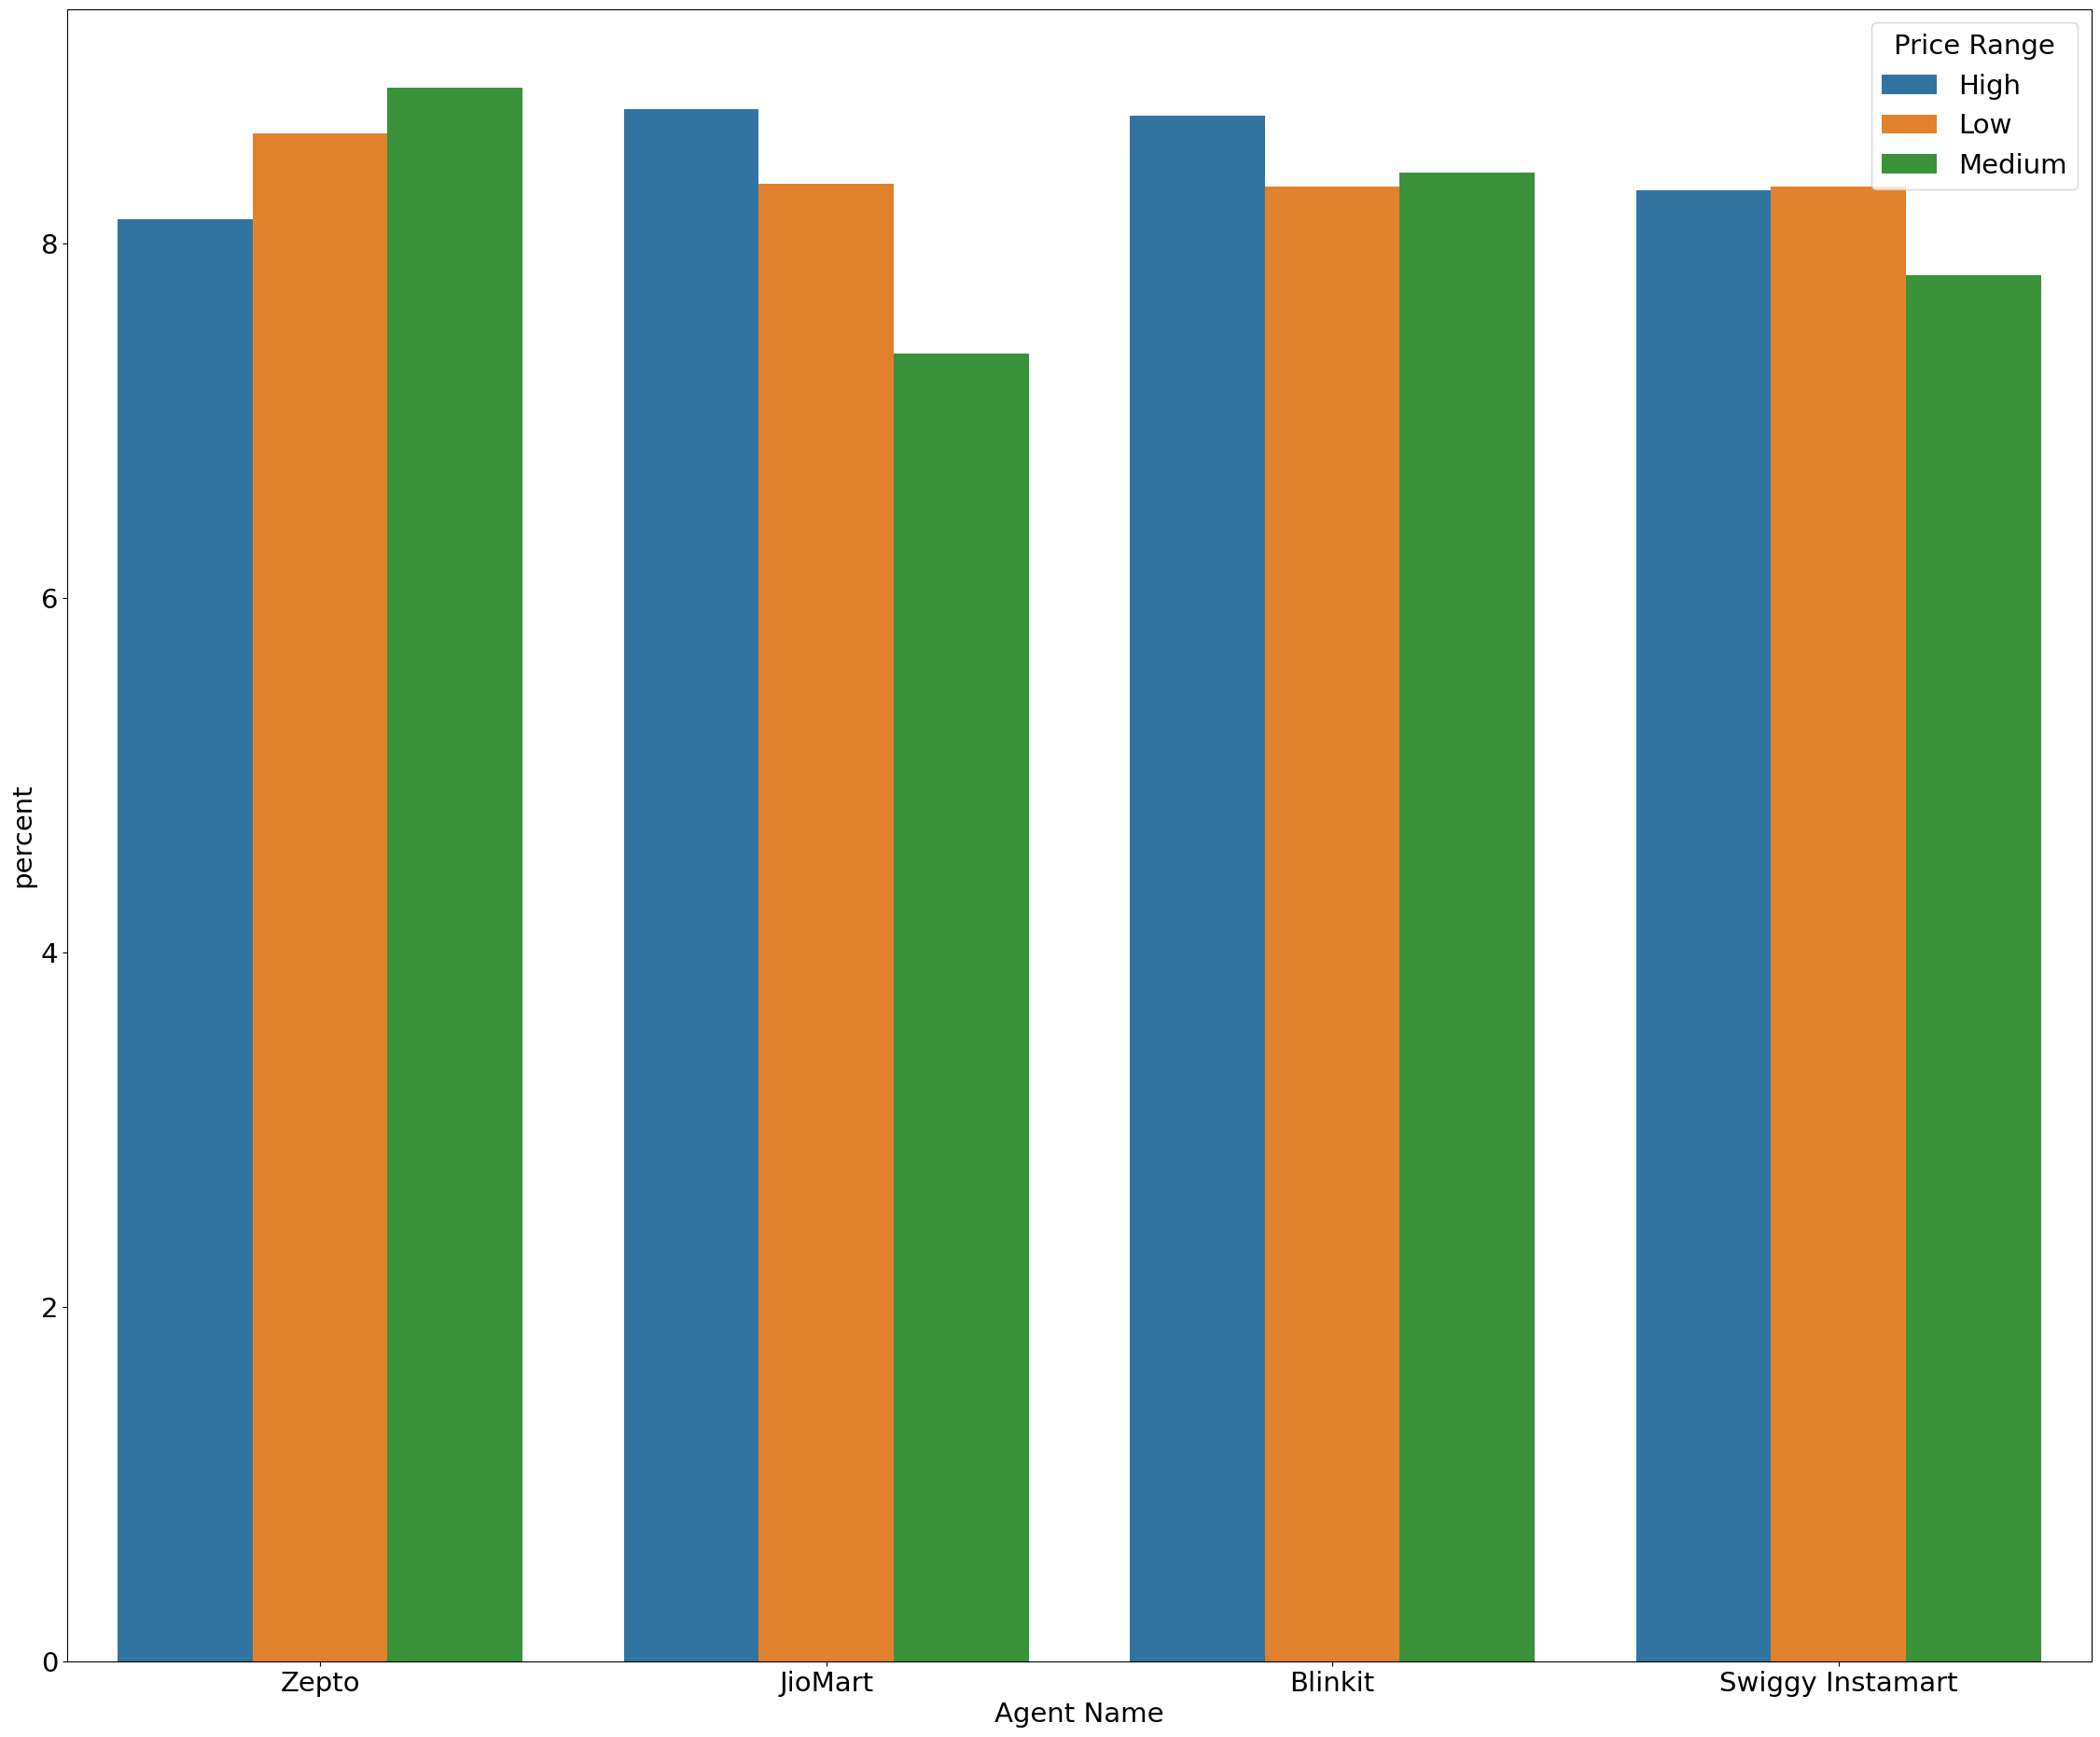

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(28,23))
sns.countplot(df,x='Agent Name',hue='Price Range',stat='percent')
plt.rcParams['font.size'] = 21


<Axes: xlabel='Delivery Time (min)', ylabel='Rating'>

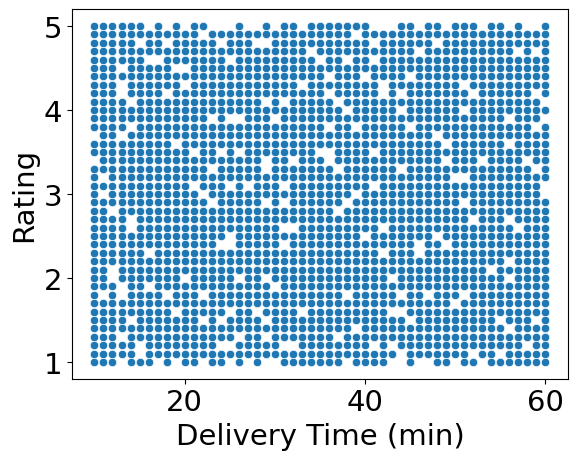

In [37]:
sns.scatterplot(df,x='Delivery Time (min)',y='Rating')

<Axes: xlabel='Customer Feedback Type', ylabel='Rating'>

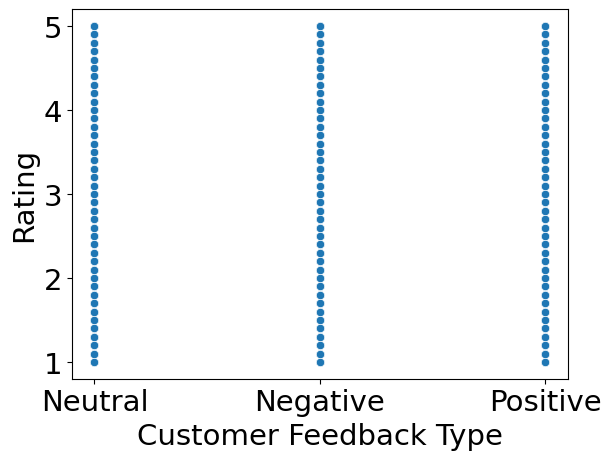

In [38]:
sns.scatterplot(df,x='Customer Feedback Type',y='Rating')

<Axes: xlabel='Price Range', ylabel='Rating'>

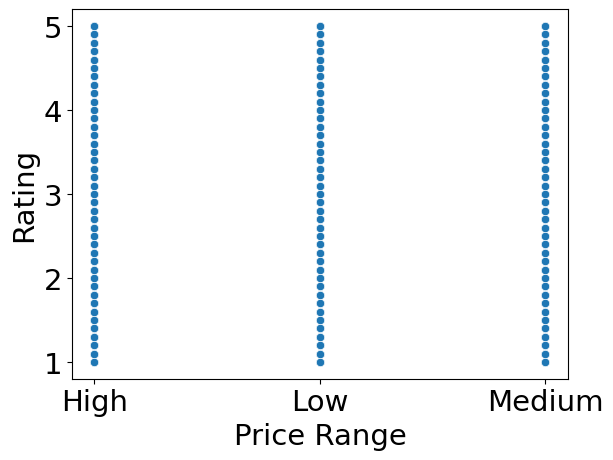

In [39]:
sns.scatterplot(df,x='Price Range',y='Rating')

<Axes: xlabel='Customer Service Rating', ylabel='Rating'>

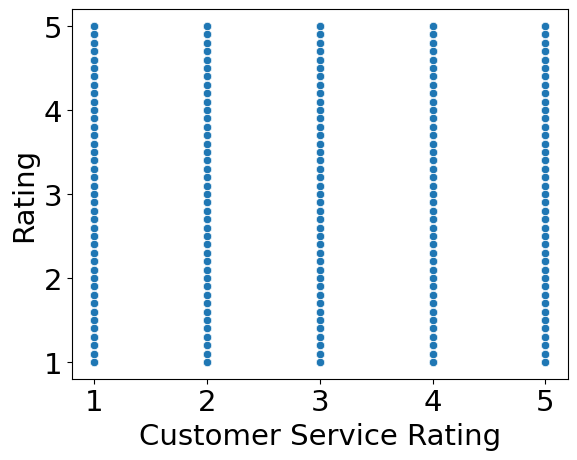

In [40]:
sns.scatterplot(df,x='Customer Service Rating',y='Rating')

In [41]:
for a in df.columns:
   print(f"{a}--- {df[a].unique()}")
    

Agent Name--- ['Zepto' 'JioMart' 'Blinkit' 'Swiggy Instamart']
Rating--- [4.5 2.1 2.6 3.6 1.9 3.3 1.5 2.8 2.5 2.9 4.6 1.8 3.8 2.  4.7 2.3 2.2 1.1
 1.3 4.8 2.4 1.6 3.4 3.1 4.3 2.7 3.7 3.  3.9 1.  1.2 4.1 4.4 1.4 1.7 5.
 4.9 4.  3.2 4.2 3.5]
Delivery Time (min)--- [58 25 54 22 34 43 46 20 10 32 17 59 15 24 49 51 12 33 14 53 60 55 38 48
 37 47 41 39 19 35 30 11 23 50 36 57 18 31 56 13 40 52 26 16 21 28 45 27
 29 42 44]
Location--- ['Delhi' 'Lucknow' 'Ahmedabad' 'Chennai' 'Pune' 'Jaipur' 'Mumbai'
 'Kolkata' 'Hyderabad' 'Bangalore']
Order Type--- ['Essentials' 'Grocery' 'Pharmacy' 'Electronics' 'Food']
Customer Feedback Type--- ['Neutral' 'Negative' 'Positive']
Price Range--- ['High' 'Low' 'Medium']
Discount Applied--- ['Yes' 'No']
Product Availability--- ['Out of Stock' 'In Stock']
Customer Service Rating--- [4 2 3 1 5]
Order Accuracy--- ['Incorrect' 'Correct']


In [42]:
for a in df.columns:
    print(a)

Agent Name
Rating
Delivery Time (min)
Location
Order Type
Customer Feedback Type
Price Range
Discount Applied
Product Availability
Customer Service Rating
Order Accuracy


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agent Name               5000 non-null   object 
 1   Rating                   5000 non-null   float64
 2   Delivery Time (min)      5000 non-null   int64  
 3   Location                 5000 non-null   object 
 4   Order Type               5000 non-null   object 
 5   Customer Feedback Type   5000 non-null   object 
 6   Price Range              5000 non-null   object 
 7   Discount Applied         5000 non-null   object 
 8   Product Availability     5000 non-null   object 
 9   Customer Service Rating  5000 non-null   int64  
 10  Order Accuracy           5000 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


In [44]:
df

,Agent Name,Rating,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...
4995,Blinkit,2.4,56,Bangalore,Grocery,Neutral,High,No,In Stock,1,Correct
4996,JioMart,3.2,45,Hyderabad,Grocery,Negative,Low,Yes,In Stock,2,Incorrect
4997,Zepto,4.7,48,Pune,Pharmacy,Positive,High,No,In Stock,5,Incorrect
4998,JioMart,3.8,11,Bangalore,Food,Negative,High,Yes,Out of Stock,1,Correct


Data Preprocessing

In [45]:
# Encoding non numerical features
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df["Order Accuracy encoded"] = le.fit_transform(df["Order Accuracy"])
df["Customer Feedback Type encoded"] = le.fit_transform(df["Customer Feedback Type"])


df1 = pd.get_dummies(df[["Agent Name","Order Type", "Price Range", "Discount Applied", "Product Availability","Location"]], drop_first=True)
df=pd.concat([df,df1],axis=1)

In [46]:
df

,Agent Name,Rating,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,...,Product Availability_Out of Stock,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Pune
0,Zepto,4.5,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,...,True,False,False,True,False,False,False,False,False,False
1,Zepto,2.1,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,...,True,False,False,False,False,False,False,True,False,False
2,JioMart,4.5,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,...,True,False,False,False,False,False,False,False,False,False
3,JioMart,2.6,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,...,False,False,True,False,False,False,False,False,False,False
4,Zepto,3.6,34,Pune,Pharmacy,Positive,High,No,In Stock,2,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Blinkit,2.4,56,Bangalore,Grocery,Neutral,High,No,In Stock,1,...,False,True,False,False,False,False,False,False,False,False
4996,JioMart,3.2,45,Hyderabad,Grocery,Negative,Low,Yes,In Stock,2,...,False,False,False,False,True,False,False,False,False,False
4997,Zepto,4.7,48,Pune,Pharmacy,Positive,High,No,In Stock,5,...,False,False,False,False,False,False,False,False,False,True
4998,JioMart,3.8,11,Bangalore,Food,Negative,High,Yes,Out of Stock,1,...,True,True,False,False,False,False,False,False,False,False


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Agent Name                         5000 non-null   object 
 1   Rating                             5000 non-null   float64
 2   Delivery Time (min)                5000 non-null   int64  
 3   Location                           5000 non-null   object 
 4   Order Type                         5000 non-null   object 
 5   Customer Feedback Type             5000 non-null   object 
 6   Price Range                        5000 non-null   object 
 7   Discount Applied                   5000 non-null   object 
 8   Product Availability               5000 non-null   object 
 9   Customer Service Rating            5000 non-null   int64  
 10  Order Accuracy                     5000 non-null   object 
 11  Order Accuracy encoded             5000 non-null   int64

In [48]:
df.columns

Index(['Agent Name', 'Rating', 'Delivery Time (min)', 'Location', 'Order Type',
       'Customer Feedback Type', 'Price Range', 'Discount Applied',
       'Product Availability', 'Customer Service Rating', 'Order Accuracy',
       'Order Accuracy encoded', 'Customer Feedback Type encoded',
       'Agent Name_JioMart', 'Agent Name_Swiggy Instamart', 'Agent Name_Zepto',
       'Order Type_Essentials', 'Order Type_Food', 'Order Type_Grocery',
       'Order Type_Pharmacy', 'Price Range_Low', 'Price Range_Medium',
       'Discount Applied_Yes', 'Product Availability_Out of Stock',
       'Location_Bangalore', 'Location_Chennai', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kolkata',
       'Location_Lucknow', 'Location_Mumbai', 'Location_Pune'],
      dtype='object')

In [49]:
# Standardisation 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Rating','Delivery Time (min)', 'Customer Service Rating']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,Agent Name,Rating,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,...,Product Availability_Out of Stock,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Pune
0,Zepto,1.299538,1.557839,Delhi,Essentials,Neutral,High,Yes,Out of Stock,0.729167,...,True,False,False,True,False,False,False,False,False,False
1,Zepto,-0.783750,-0.673673,Lucknow,Grocery,Negative,Low,No,Out of Stock,-0.689446,...,True,False,False,False,False,False,False,True,False,False
2,JioMart,1.299538,1.287353,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,0.019861,...,True,False,False,False,False,False,False,False,False,False
3,JioMart,-0.349732,-0.876538,Chennai,Essentials,Neutral,Low,Yes,In Stock,-1.398752,...,False,False,True,False,False,False,False,False,False,False
4,Zepto,0.518305,-0.065079,Pune,Pharmacy,Positive,High,No,In Stock,-0.689446,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Blinkit,-0.523339,1.422596,Bangalore,Grocery,Neutral,High,No,In Stock,-1.398752,...,False,True,False,False,False,False,False,False,False,False
4996,JioMart,0.171090,0.678758,Hyderabad,Grocery,Negative,Low,Yes,In Stock,-0.689446,...,False,False,False,False,True,False,False,False,False,False
4997,Zepto,1.473145,0.881623,Pune,Pharmacy,Positive,High,No,In Stock,1.438473,...,False,False,False,False,False,False,False,False,False,True
4998,JioMart,0.691912,-1.620375,Bangalore,Food,Negative,High,Yes,Out of Stock,-1.398752,...,True,True,False,False,False,False,False,False,False,False


In [50]:
# Converting OneHotEncoding to numerical labels
a=['Agent Name_JioMart', 'Agent Name_Swiggy Instamart', 'Agent Name_Zepto',
       'Order Type_Essentials', 'Order Type_Food', 'Order Type_Grocery',
       'Order Type_Pharmacy', 'Price Range_Low', 'Price Range_Medium',
       'Discount Applied_Yes', 'Product Availability_Out of Stock',
       'Location_Bangalore', 'Location_Chennai', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kolkata',
       'Location_Lucknow', 'Location_Mumbai', 'Location_Pune']

for b in a:
 df[b] = le.fit_transform(df[b])



In [51]:
df

,Agent Name,Rating,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,...,Product Availability_Out of Stock,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Pune
0,Zepto,1.299538,1.557839,Delhi,Essentials,Neutral,High,Yes,Out of Stock,0.729167,...,1,0,0,1,0,0,0,0,0,0
1,Zepto,-0.783750,-0.673673,Lucknow,Grocery,Negative,Low,No,Out of Stock,-0.689446,...,1,0,0,0,0,0,0,1,0,0
2,JioMart,1.299538,1.287353,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,0.019861,...,1,0,0,0,0,0,0,0,0,0
3,JioMart,-0.349732,-0.876538,Chennai,Essentials,Neutral,Low,Yes,In Stock,-1.398752,...,0,0,1,0,0,0,0,0,0,0
4,Zepto,0.518305,-0.065079,Pune,Pharmacy,Positive,High,No,In Stock,-0.689446,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Blinkit,-0.523339,1.422596,Bangalore,Grocery,Neutral,High,No,In Stock,-1.398752,...,0,1,0,0,0,0,0,0,0,0
4996,JioMart,0.171090,0.678758,Hyderabad,Grocery,Negative,Low,Yes,In Stock,-0.689446,...,0,0,0,0,1,0,0,0,0,0
4997,Zepto,1.473145,0.881623,Pune,Pharmacy,Positive,High,No,In Stock,1.438473,...,0,0,0,0,0,0,0,0,0,1
4998,JioMart,0.691912,-1.620375,Bangalore,Food,Negative,High,Yes,Out of Stock,-1.398752,...,1,1,0,0,0,0,0,0,0,0


PCA

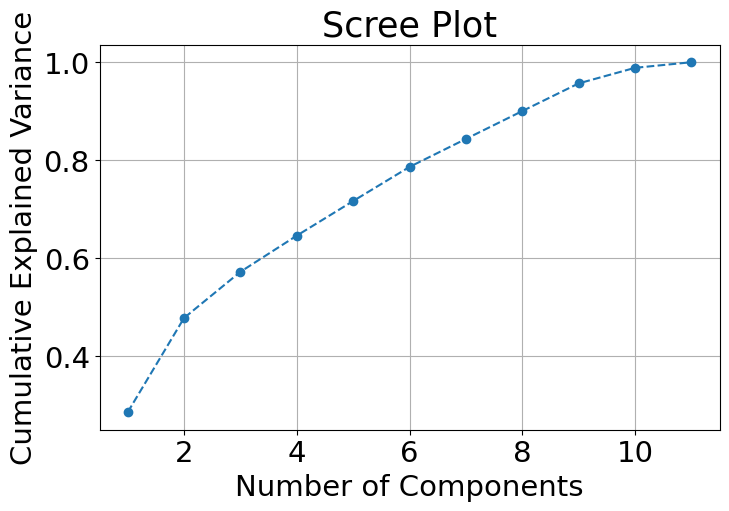

In [52]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(df[['Delivery Time (min)',
       'Order Accuracy encoded', 'Customer Feedback Type encoded',
              'Order Type_Essentials', 'Order Type_Food', 'Order Type_Grocery',
       'Order Type_Pharmacy', 'Price Range_Low', 'Price Range_Medium',
       'Discount Applied_Yes', 'Product Availability_Out of Stock']])
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [53]:
!pip install kneed

In [54]:
# We choosed n = 8 as it covers nearly 90% Varience
pca = PCA(n_components=8)
X_pca = pca.fit_transform(df[['Delivery Time (min)',
       'Order Accuracy encoded', 'Customer Feedback Type encoded',
              'Order Type_Essentials', 'Order Type_Food', 'Order Type_Grocery',
       'Order Type_Pharmacy', 'Price Range_Low', 'Price Range_Medium',
       'Discount Applied_Yes', 'Product Availability_Out of Stock']])

In [55]:
X_pca.shape

(5000, 8)

In [56]:
!pip install Kneed

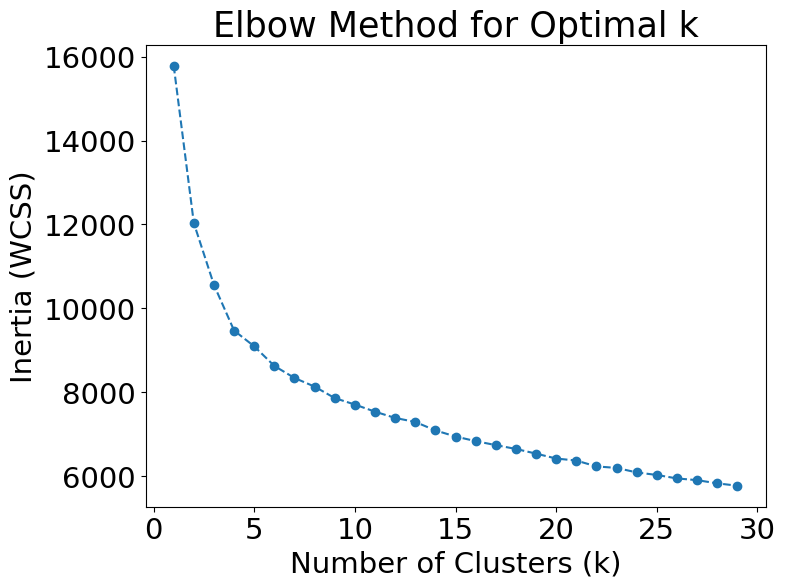

6

In [59]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 30) 
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++',n_init='auto')
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)  
# Plot Elbow Curve
plt.figure(figsize=(8,6))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

from kneed import KneeLocator
k1=KneeLocator(range(1,30),inertia,curve='convex',direction='decreasing')
k1.elbow

In [60]:
from sklearn.metrics import silhouette_score

best_k = 2
best_score = -1

for k in range(2, 10):  # Silhouette is valid for k ≥ 2
    kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++',n_init='auto')
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    
    if score > best_score:
        best_k = k
        best_score = score

print(f"Optimal number of clusters: {best_k} with silhouette score: {best_score}")


Optimal number of clusters: 2 with silhouette score: 0.2079214280670908


In [61]:
# Since silhouette Score is better metric for clustering we choosed number of cluster as 2
kmeans = KMeans(n_clusters=2, random_state=42,init='k-means++',n_init='auto')
labels = kmeans.fit_predict(X_pca)
score = silhouette_score(X_pca, labels)
print(score)

0.2079214280670908


In [62]:
# Plotting clusters using TSNE 
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3)
X_tsne=tsne.fit_transform(X_pca)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization with K-Means Clustering")
plt.colorbar(label="Cluster")
plt.show()

In [64]:
# Checking Silhouette score for DBSCAN
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
labels_dbscan = dbscan.fit_predict(X_pca)
score = silhouette_score(X_pca, labels_dbscan)
print(score)

0.08037165625886027


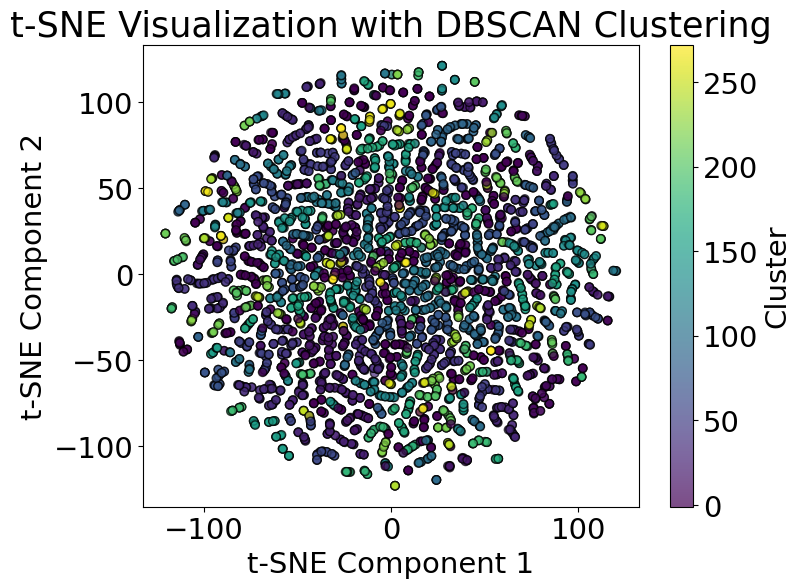

In [65]:
# Ploting DBSCAN Cluster 
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_dbscan, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization with DBSCAN Clustering")
plt.colorbar(label="Cluster")
plt.show()

In [66]:
df['cluster'] = labels

In [67]:
df

,Agent Name,Rating,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,...,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Pune,cluster
0,Zepto,1.299538,1.557839,Delhi,Essentials,Neutral,High,Yes,Out of Stock,0.729167,...,0,0,1,0,0,0,0,0,0,1
1,Zepto,-0.783750,-0.673673,Lucknow,Grocery,Negative,Low,No,Out of Stock,-0.689446,...,0,0,0,0,0,0,1,0,0,0
2,JioMart,1.299538,1.287353,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,0.019861,...,0,0,0,0,0,0,0,0,0,1
3,JioMart,-0.349732,-0.876538,Chennai,Essentials,Neutral,Low,Yes,In Stock,-1.398752,...,0,1,0,0,0,0,0,0,0,0
4,Zepto,0.518305,-0.065079,Pune,Pharmacy,Positive,High,No,In Stock,-0.689446,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Blinkit,-0.523339,1.422596,Bangalore,Grocery,Neutral,High,No,In Stock,-1.398752,...,1,0,0,0,0,0,0,0,0,1
4996,JioMart,0.171090,0.678758,Hyderabad,Grocery,Negative,Low,Yes,In Stock,-0.689446,...,0,0,0,1,0,0,0,0,0,1
4997,Zepto,1.473145,0.881623,Pune,Pharmacy,Positive,High,No,In Stock,1.438473,...,0,0,0,0,0,0,0,0,1,1
4998,JioMart,0.691912,-1.620375,Bangalore,Food,Negative,High,Yes,Out of Stock,-1.398752,...,1,0,0,0,0,0,0,0,0,0


In [68]:
df[numerical_features] = scaler.inverse_transform(df[numerical_features])

In [69]:
df

,Agent Name,Rating,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,...,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Pune,cluster
0,Zepto,4.5,58.0,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4.0,...,0,0,1,0,0,0,0,0,0,1
1,Zepto,2.1,25.0,Lucknow,Grocery,Negative,Low,No,Out of Stock,2.0,...,0,0,0,0,0,0,1,0,0,0
2,JioMart,4.5,54.0,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3.0,...,0,0,0,0,0,0,0,0,0,1
3,JioMart,2.6,22.0,Chennai,Essentials,Neutral,Low,Yes,In Stock,1.0,...,0,1,0,0,0,0,0,0,0,0
4,Zepto,3.6,34.0,Pune,Pharmacy,Positive,High,No,In Stock,2.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Blinkit,2.4,56.0,Bangalore,Grocery,Neutral,High,No,In Stock,1.0,...,1,0,0,0,0,0,0,0,0,1
4996,JioMart,3.2,45.0,Hyderabad,Grocery,Negative,Low,Yes,In Stock,2.0,...,0,0,0,1,0,0,0,0,0,1
4997,Zepto,4.7,48.0,Pune,Pharmacy,Positive,High,No,In Stock,5.0,...,0,0,0,0,0,0,0,0,1,1
4998,JioMart,3.8,11.0,Bangalore,Food,Negative,High,Yes,Out of Stock,1.0,...,1,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(df[["Delivery Time (min)", "Rating", "Customer Service Rating"]])

# -1 means anomaly, 1 means normal
anomalies = df[df["Anomaly"] == -1]
print(anomalies)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


            Agent Name  Rating  Delivery Time (min)   Location   Order Type  \
28               Zepto     2.2                 60.0  Bangalore         Food   
63    Swiggy Instamart     2.5                 60.0  Bangalore      Grocery   
64             Blinkit     1.0                 41.0    Lucknow   Essentials   
68             JioMart     1.2                 59.0    Kolkata   Essentials   
86             Blinkit     4.7                 60.0     Jaipur  Electronics   
...                ...     ...                  ...        ...          ...   
4923           JioMart     4.4                 58.0      Delhi      Grocery   
4941  Swiggy Instamart     2.3                 10.0    Chennai      Grocery   
4948           Blinkit     1.0                 49.0    Lucknow  Electronics   
4954             Zepto     4.3                 60.0    Kolkata   Essentials   
4967           Blinkit     1.2                 57.0       Pune     Pharmacy   

     Customer Feedback Type Price Range Discount Ap

In [71]:
df_cleaned = df[df["Anomaly"] == 1].drop(columns=["Anomaly"])

Repeating all the above process 

In [72]:
df_cleaned.describe()

,Rating,Delivery Time (min),Customer Service Rating,Order Accuracy encoded,Customer Feedback Type encoded,Agent Name_JioMart,Agent Name_Swiggy Instamart,Agent Name_Zepto,Order Type_Essentials,Order Type_Food,...,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Pune,cluster
count,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,...,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000
mean,3.006695,35.001895,2.971789,0.498737,0.988211,0.244211,0.246316,0.256421,0.200842,0.200211,...,0.101895,0.095368,0.104421,0.098105,0.097263,0.102947,0.093474,0.100211,0.102947,0.494947
std,1.122494,14.199886,1.385955,0.500051,0.822322,0.429663,0.430910,0.436703,0.400672,0.400200,...,0.302542,0.293754,0.305838,0.297488,0.296347,0.303922,0.291126,0.300312,0.303922,0.500027
min,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.100000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,35.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,47.000000,4.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,60.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


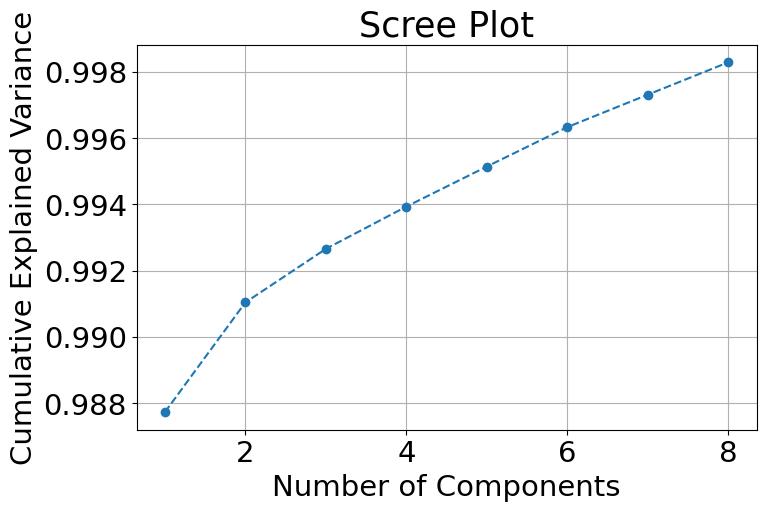

In [73]:
pca.fit_transform(df_cleaned[['Delivery Time (min)',
       'Order Accuracy encoded', 'Customer Feedback Type encoded',
              'Order Type_Essentials', 'Order Type_Food', 'Order Type_Grocery',
       'Order Type_Pharmacy', 'Price Range_Low', 'Price Range_Medium',
       'Discount Applied_Yes', 'Product Availability_Out of Stock']])
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [74]:
pca = PCA(n_components=6)
X_pca1 = pca.fit_transform(df_cleaned[['Delivery Time (min)',
       'Order Accuracy encoded', 'Customer Feedback Type encoded',
              'Order Type_Essentials', 'Order Type_Food', 'Order Type_Grocery',
       'Order Type_Pharmacy', 'Price Range_Low', 'Price Range_Medium',
       'Discount Applied_Yes', 'Product Availability_Out of Stock']])

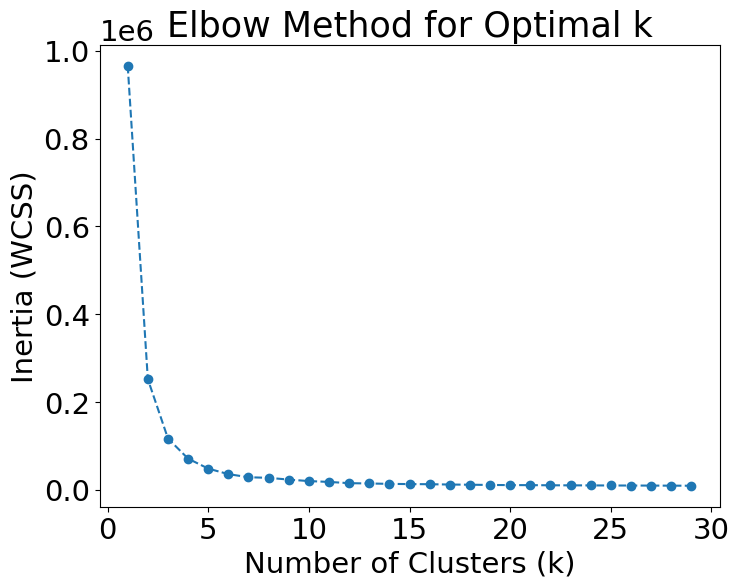

4

In [75]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 30)  # Testing k from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++',n_init='auto')
    kmeans.fit(X_pca1)
    inertia.append(kmeans.inertia_)  # Store inertia for each k

# Plot Elbow Curve
plt.figure(figsize=(8,6))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

k1=KneeLocator(range(1,30),inertia,curve='convex',direction='decreasing')
k1.elbow

In [76]:
from sklearn.metrics import silhouette_score

best_k = 2
best_score = -1

for k in range(2, 10):  # Silhouette is valid for k ≥ 2
    kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++',n_init='auto')
    labels1 = kmeans.fit_predict(X_pca1)
    score = silhouette_score(X_pca1, labels1)
    
    if score > best_score:
        best_k = k
        best_score = score

print(f"Optimal number of clusters: {best_k} with silhouette score: {best_score}")

Optimal number of clusters: 2 with silhouette score: 0.6080493083242169


In [77]:
kmeans = KMeans(n_clusters=2, random_state=42,init='k-means++',n_init='auto')
labels1 = kmeans.fit_predict(X_pca1)
score = silhouette_score(X_pca1, labels1)
print(score)

0.6080493083242169


In [78]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3)
X_tsne1=tsne.fit_transform(X_pca1)

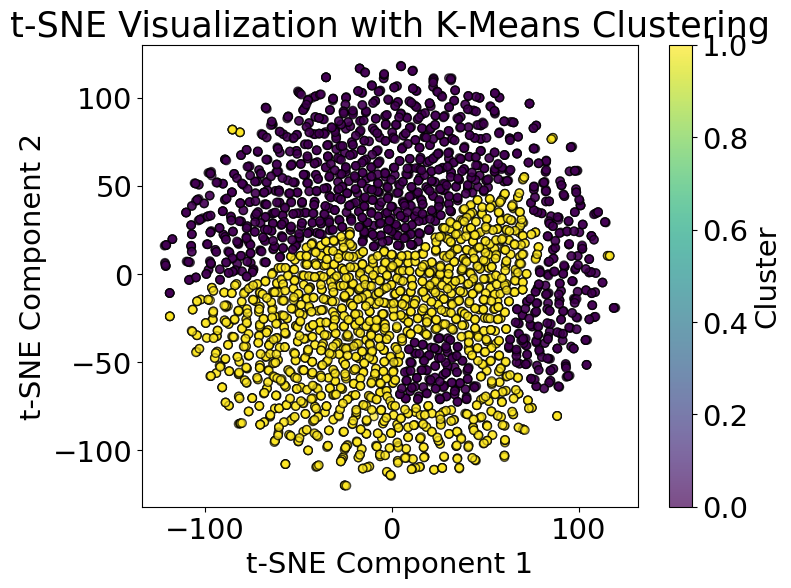

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne1[:, 0], X_tsne1[:, 1], c=labels1, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization with K-Means Clustering")
plt.colorbar(label="Cluster")
plt.show()

In [80]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
labels_dbscan1 = dbscan.fit_predict(X_pca1)
score = silhouette_score(X_pca1, labels_dbscan1)
print(score)

-0.8007538999276885


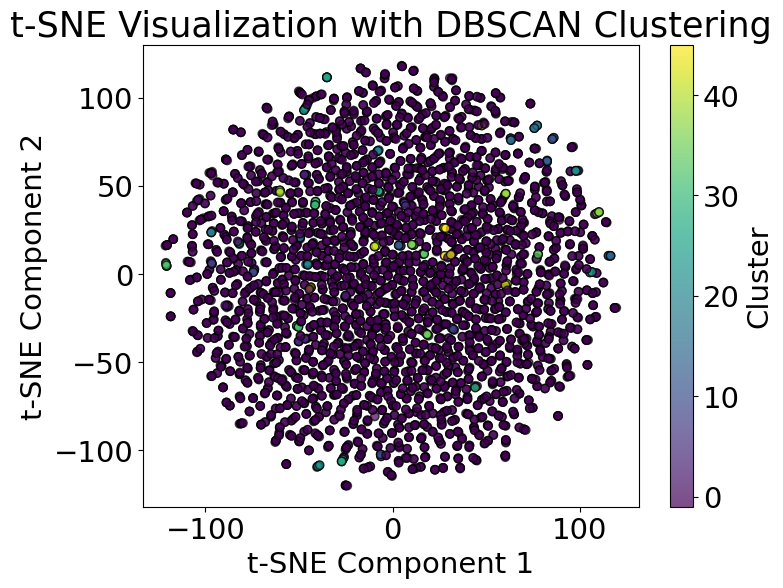

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne1[:, 0], X_tsne1[:, 1], c=labels_dbscan1, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization with DBSCAN Clustering")
plt.colorbar(label="Cluster")
plt.show()

After removing all anomalies we got better Silhouette score with K- Means